# Case Titanic

## Historia

 O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável". A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda.



 Todavia, como todos sabemos ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história.

 O objetivo e' criar um modelo que prediza se uma pessoa a bordo dele sobreviveria ou não do naufragio.

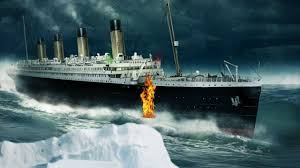

# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Obterndo Dados

Este conjunto do [Titanic, se encontra no Kaggle](https://www.kaggle.com/c/titanic).

In [2]:
df_train = pd.read_csv('titanic_kaggle.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Estudando os Dados

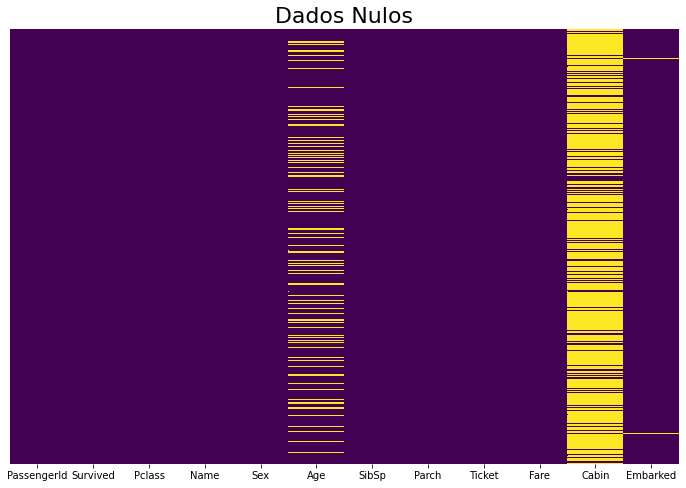

In [6]:
# Visualizando onde ha' Valores NaN
plt.figure(figsize=(12,8))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Dados Nulos',size = 22)
plt.show()

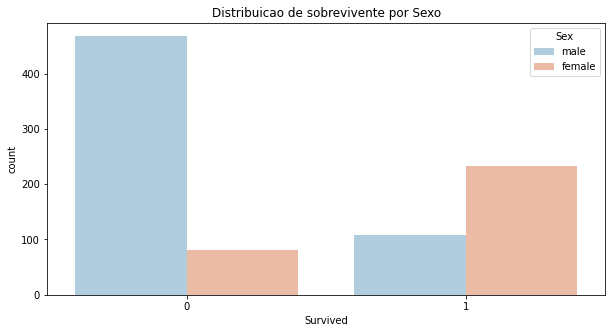

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',hue = 'Sex',data = df_train,palette='RdBu_r')
plt.title("Distribuicao de sobrevivente por Sexo")
plt.show()

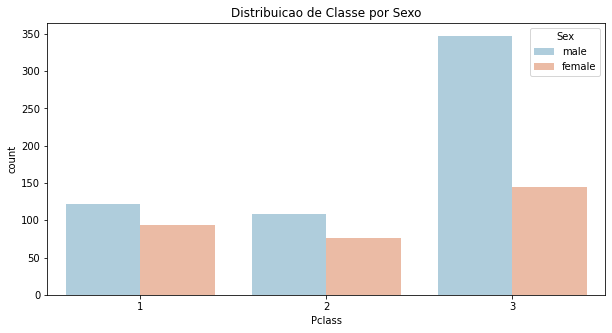

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass',hue = 'Sex',data = df_train,palette='RdBu_r')
plt.title("Distribuicao de Classe por Sexo")
plt.show()

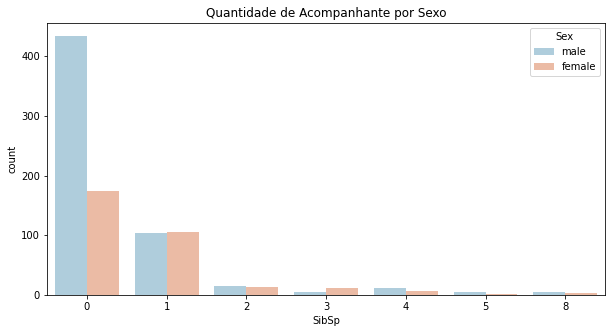

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='SibSp',hue = 'Sex',data = df_train,palette='RdBu_r')
plt.title("Quantidade de Acompanhante por Sexo")
plt.show()

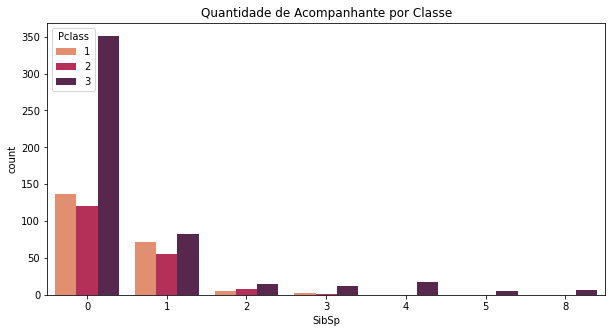

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='SibSp',hue = 'Pclass',data = df_train,palette='rocket_r')
plt.title("Quantidade de Acompanhante por Classe")
plt.show()

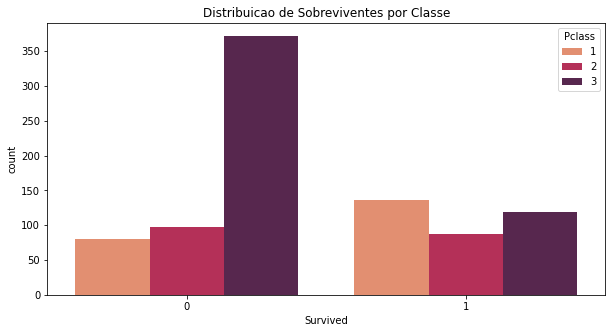

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',hue = 'Pclass',data = df_train,palette='rocket_r')
plt.title("Distribuicao de Sobreviventes por Classe")
plt.show()

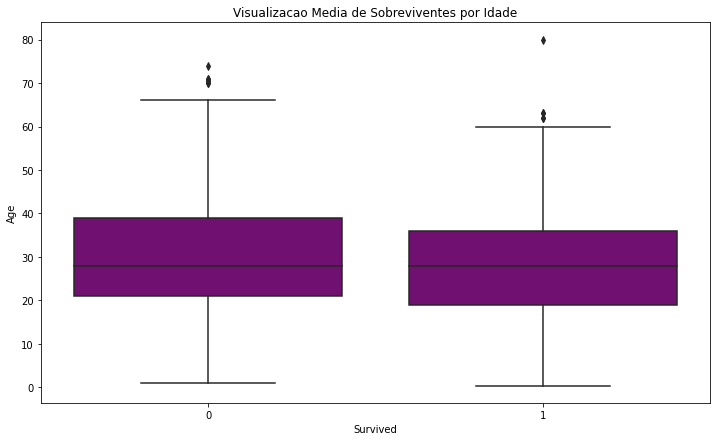

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Survived',y='Age',data=df_train,color='purple')
plt.title("Visualizacao Media de Sobreviventes por Idade")
plt.show()

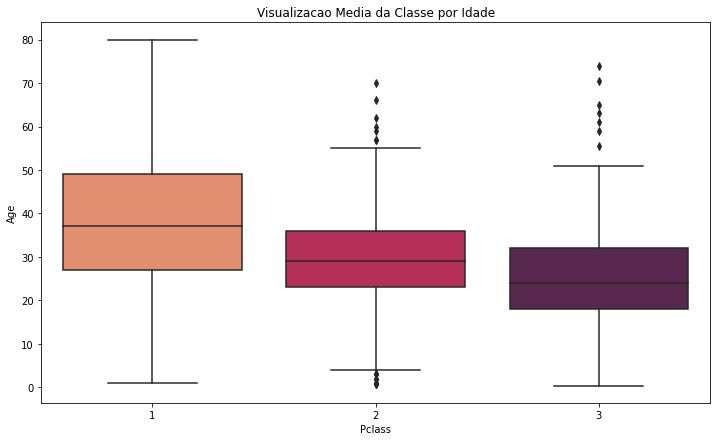

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='rocket_r')
plt.title("Visualizacao Media da Classe por Idade")
plt.show()

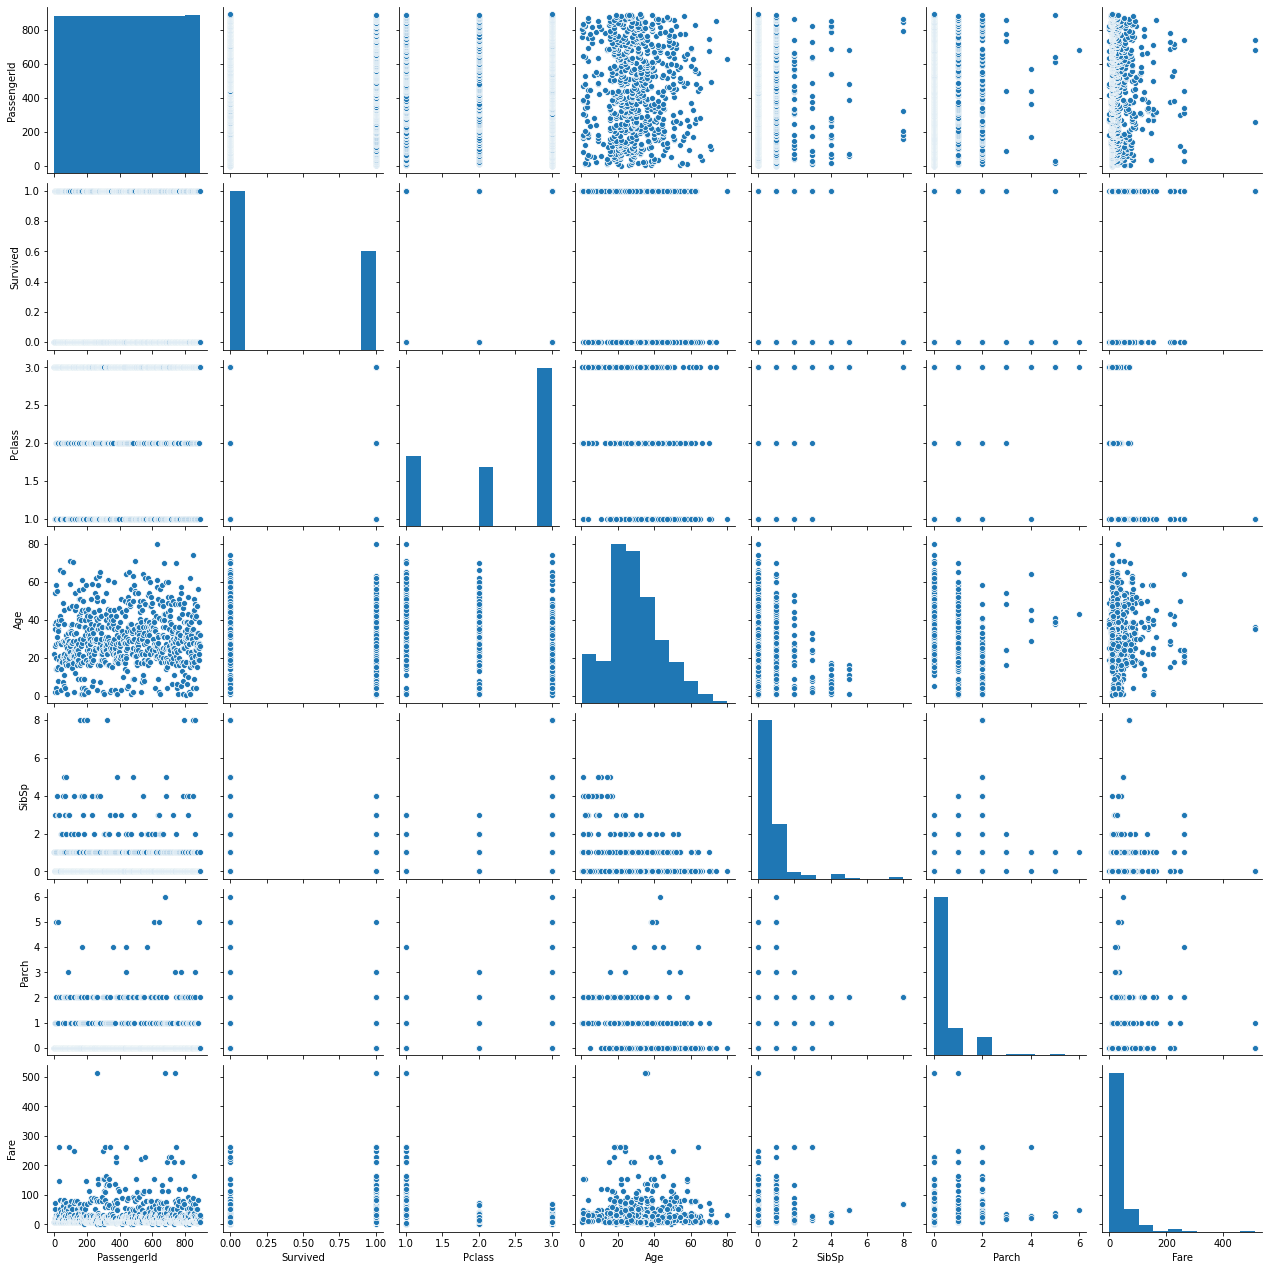

In [14]:
sns.pairplot(df_train)

# Tratando Dados

In [15]:
# Criando Funcao Para Substituir Valores Faltantes das Colunas 'Age',
# (Foi levado como parametro para decidir o Imput o valor da Classe do Indiviuo)
def age_nan(column):
    Age = column[0]
    Pclass = column[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            media_1 = np.mean(df_train[df_train['Pclass']==1]['Age'])
            return media_1
        elif Pclass == 2:
            media_2 = np.mean(df_train[df_train['Pclass']==2]['Age'])
            return media_2
        else:
            media_3 = np.mean(df_train[df_train['Pclass']==3]['Age'])
            return media_3
    else:
        return Age

In [16]:
# Usando a funcao nas Bases
df_train['Age'] = df_train[['Age','Pclass']].apply(age_nan,axis=1)

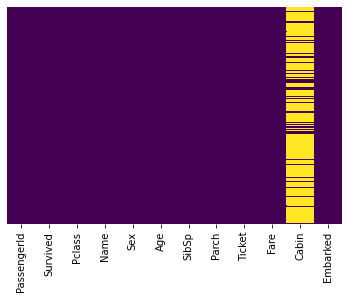

In [18]:
# Fisualizando Valores NaN

sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
# Excluindo Colunas Cabin e Valores Nulos de Demais Colunas
df_train = df_train.drop('Cabin',axis = 1)
df_train.dropna(inplace=True)

## Convertendo recursos categóricos

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [21]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
df_train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df_train = pd.concat([df_train,sex,embark],axis=1)
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train.drop('Survived',axis=1), 
                                                    df_train['Survived'], 
                                                    test_size=0.30, random_state=101)

# Construindo o Modelo

In [23]:
# Arvore de Decisao
tree = DecisionTreeClassifier()
x_train = df_train.drop('Survived',axis=1)
y_train = df_train['Survived']

In [24]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
# Floresta Aleatoria
rfc = RandomForestClassifier(n_estimators=500)

In [26]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Previsões e avaliação dos Modelos

In [27]:
# Matrix de Confusao da Arvore
predict_a = rfc.predict(x_test)
print(confusion_matrix(y_test,predict_a))

[[162   1]
 [  6  98]]


In [28]:
# Verificando Acuracia
print(classification_report(y_test,predict_a))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       163
           1       0.99      0.94      0.97       104

    accuracy                           0.97       267
   macro avg       0.98      0.97      0.97       267
weighted avg       0.97      0.97      0.97       267



In [29]:
# Matrix de Confusao da Floresta
predict_f = tree.predict(x_test)
print(confusion_matrix(y_test,predict_f))

[[162   1]
 [  7  97]]


In [30]:
# Verificando Acuracia
print(classification_report(y_test,predict_f))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       163
           1       0.99      0.93      0.96       104

    accuracy                           0.97       267
   macro avg       0.97      0.96      0.97       267
weighted avg       0.97      0.97      0.97       267



## Conclusão

 Com esses Modelos criados, não houve um Modelo que se destaca em relacão ao outro, o esperado inicialmente era que talvez o Modelo de Florestas Aleatorias fosse superior ao Modelos de Arvore de Decisao, no entando, o que foi resultado foram dois Modelos comprindo muito bem o seu papel e atingindo uma **Acuracia de 97%** no geral. 

Foi observado que pessoas com Classe Social mais alta e/ou Mulheres tiveram maior chance de sobreviveram do desastre, outros parametros nao deixaram de ser importantes porem nao se sobressairam como estes, como um exemplo a idade, que houve pouca alteracao na media dos sobreviventes e dos mortos, apesar da maioria viva ser pouco mais nova que a populacao que nao sobreviveu, a pequena diferenca fez desse um fator pouco menos relevante.